In [1]:
## Start of Assignment 3
## Name: Tekuri Sai Akhil
## NetId: st5050

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [3]:
#Loading dataset and cleaning
df = pd.read_csv('kddcup99_csv.csv')
df.drop(df[df['label'] == 'normal'].index, inplace = True)
df = df.drop_duplicates()
df = df.dropna()

In [4]:
#One hot encoding of categorical features
categories_data = df[['protocol_type','service','flag']]
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(categories_data)
categories_data_transformed = enc.transform(categories_data).toarray()
categories_data_transformed = pd.DataFrame(categories_data_transformed)

In [5]:
new_df = df.drop(['protocol_type','service','flag'], axis=1)
Y = np.array(new_df['label'])
X = pd.DataFrame(np.array(new_df.drop(['label'],axis=1)))
X = pd.concat([X, categories_data_transformed], axis=1)

In [6]:
column_names = df.columns
column_names = np.append(np.array(column_names[0]),(np.array(column_names[4:-1])))
column_names = np.append(column_names,np.array(['protocol_type']*3))
column_names = np.append(column_names,np.array(['service']*62))
column_names = np.append(column_names,np.array(['flag']*11))

In [7]:
X = np.array(X)
Y[(Y =='ipsweep')]=0.0
Y[(Y =='nmap')]=0.0
Y[(Y =='portsweep')]=0.0
Y[(Y =='satan')]=0.0
Y[(Y !=0.0)]=1.0
Y = Y.astype('float64')

In [8]:
#unbalances dataset shapes
print(X.shape)
print(Y.shape)

(57754, 114)
(57754,)


In [9]:
#balancing the dataset
rus = RandomUnderSampler()
X, Y = rus.fit_resample(X, Y)
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [10]:
#balances dataset shapes
print(X.shape)
print(Y.shape)

(4262, 114)
(4262,)


In [11]:
#Splitting the data into train(80%) and test(20%) randomly 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#train dataset shapes
print(X_train.shape)
print(Y_train.shape)

#test dataset shapes
print(X_test.shape)
print(Y_test.shape)

(3409, 114)
(3409,)
(853, 114)
(853,)


In [12]:
#without regularization
logreg = LogisticRegression(penalty=None, max_iter =100)
logreg.fit(X_train, Y_train)
train_accuracy = logreg.score(X_train, Y_train)
test_accuracy = logreg.score(X_test, Y_test)
number_of_iterations = logreg.n_iter_[0]
w = logreg.coef_[0]

In [13]:
print("No regularization is used:")
print("Train accuracy = "+str(train_accuracy))
print("Test accuracy = "+str(test_accuracy))
print("Number of iteration to converge = "+str(number_of_iterations))
print("No. I don't think my model over fits because it is able to perform well on both train and test data")

No regularization is used:
Train accuracy = 1.0
Test accuracy = 0.9953106682297772
Number of iteration to converge = 31
No. I don't think my model over fits because it is able to perform well on both train and test data


In [14]:
indices = np.argsort(np.abs(w))[::-1]
print("Top 10 features have the largest weights in absolute value:\n")
for i in range(10):
    print(str(i+1)+") (feature, weight) = ("+str(column_names[indices[i]])+","+ str(w[indices[i]])+")")
print("\nThese are potentially most informative features for the trained model")
print("You can see the values of each weight ranges from " +str(np.min(w))+" to "+str(np.max(w)))

Top 10 features have the largest weights in absolute value:

1) (feature, weight) = (diff_srv_rate,-19.333346971543595)
2) (feature, weight) = (dst_host_serror_rate,17.481377082175825)
3) (feature, weight) = (dst_host_diff_srv_rate,-16.314895710684016)
4) (feature, weight) = (wrong_fragment,16.213626740208852)
5) (feature, weight) = (dst_host_same_src_port_rate,-15.917116375479944)
6) (feature, weight) = (serror_rate,9.53236926408896)
7) (feature, weight) = (dst_host_rerror_rate,8.387182091900778)
8) (feature, weight) = (same_srv_rate,-7.9492096687030696)
9) (feature, weight) = (logged_in,7.371997350507549)
10) (feature, weight) = (count,6.551174525274073)

These are potentially most informative features for the trained model
You can see the values of each weight ranges from -19.333346971543595 to 17.481377082175825


In [15]:
print("Let's look at the top 5 features:")
print("1) 'dst_host_diff_srv_rate' describes '% of different services on current host'")
print("2) 'dst_host_serror_rate' describes '% of connections to current host that has an S0 error'")
print("3) 'dst_host_same_src_port_rate' describes '% of connections to current host having same src port'")
print("4) 'diff_srv_rate' describes '% of connections to different services'")
print("5) 'dst_host_same_srv_rate' describes '% of connections having same dst host and using same service'")
print(" and so on....\n")
print("From the defination of probe attack 'Probing attacks are an invasive method for bypassing security measures by observing the physical silicon implementation of a chip. As an invasive attack, one directly accesses the internal wires and connections of a targeted device and extracts sensitive information'\n")
print("1) Number of connections may be a good idea of the type of attack")
print("2) From looking at the top 5 features, they represent the % of connection/services on the hosts")
print("3) Therefore it makes sense for these features to have the absolute high values for weights")

Let's look at the top 5 features:
1) 'dst_host_diff_srv_rate' describes '% of different services on current host'
2) 'dst_host_serror_rate' describes '% of connections to current host that has an S0 error'
3) 'dst_host_same_src_port_rate' describes '% of connections to current host having same src port'
4) 'diff_srv_rate' describes '% of connections to different services'
5) 'dst_host_same_srv_rate' describes '% of connections having same dst host and using same service'
 and so on....

From the defination of probe attack 'Probing attacks are an invasive method for bypassing security measures by observing the physical silicon implementation of a chip. As an invasive attack, one directly accesses the internal wires and connections of a targeted device and extracts sensitive information'

1) Number of connections may be a good idea of the type of attack
2) From looking at the top 5 features, they represent the % of connection/services on the hosts
3) Therefore it makes sense for these fe

In [16]:
#with L1 regularization
logreg = LogisticRegression(penalty='l1',solver ='liblinear', max_iter =100)
logreg.fit(X_train, Y_train)
train_accuracy = logreg.score(X_train, Y_train)
test_accuracy = logreg.score(X_test, Y_test)
number_of_iterations = logreg.n_iter_[0]
w = logreg.coef_[0]

In [17]:
print("Train accuracy = "+str(train_accuracy))
print("Test accuracy = "+str(test_accuracy))
print("Number of iteration to converge = "+str(number_of_iterations))

Train accuracy = 1.0
Test accuracy = 0.9988276670574443
Number of iteration to converge = 12


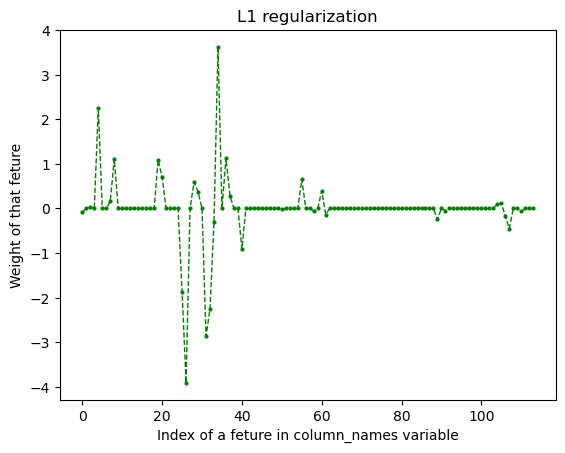

column name variable mention in x-axis is printed below


In [18]:
fig = plt.figure()
plt.plot(np.arange(114), w, 'go--', linewidth=1, markersize=2)
plt.xlabel("Index of a feture in column_names variable")
plt.ylabel("Weight of that feture")
plt.title("L1 regularization")
plt.show()
print("column name variable mention in x-axis is printed below")

In [19]:
#with L2 regularization
logreg = LogisticRegression(penalty='l2',solver ='liblinear', max_iter =100)
logreg.fit(X_train, Y_train)
train_accuracy = logreg.score(X_train, Y_train)
test_accuracy = logreg.score(X_test, Y_test)
number_of_iterations = logreg.n_iter_[0]
w = logreg.coef_[0]

In [20]:
print("Train accuracy = "+str(train_accuracy))
print("Test accuracy = "+str(test_accuracy))
print("Number of iteration to converge = "+str(number_of_iterations))

Train accuracy = 1.0
Test accuracy = 0.9964830011723329
Number of iteration to converge = 8


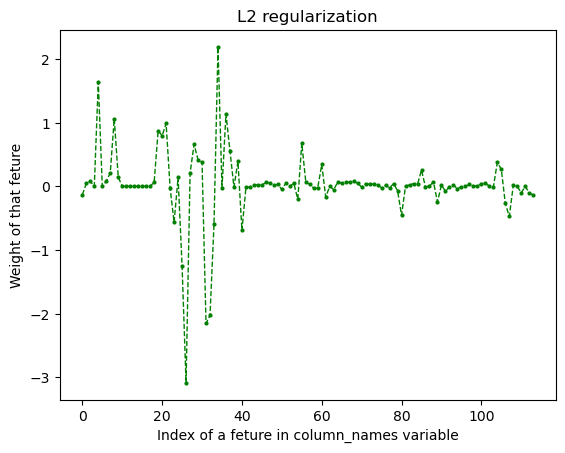

column name variable mention in x-axis is printed below


In [21]:
fig = plt.figure()
plt.plot(np.arange(114), w, 'go--', linewidth=1, markersize=2)
plt.xlabel("Index of a feture in column_names variable")
plt.ylabel("Weight of that feture")
plt.title("L2 regularization")
plt.show()
print("column name variable mention in x-axis is printed below")

In [22]:
print("1) The train and test accuracies of both L1 and L2 are approximately same")
print("2) Both L1 and L2 regularizations takes less time to converge comared to the case with no regularization term")
print("3) As you can see in the L1 regularization plot, most of the weights are zero. This is expected because in L1 regularization we add |w| term to the loss function and it gives out the sparse weights with most of the weights being 0")
print("4) As you can see in the L2 regularization polt, the range of magnitudes of weights in L2 regression are very small compared to the range of magnitudes weights when no regularization is applied. This is expected becuase we added |w|^2 term to the loss function and L2 gives out weights with small magnitudes")

1) The train and test accuracies of both L1 and L2 are approximately same
2) Both L1 and L2 regularizations takes less time to converge comared to the case with no regularization term
3) As you can see in the L1 regularization plot, most of the weights are zero. This is expected because in L1 regularization we add |w| term to the loss function and it gives out the sparse weights with most of the weights being 0
4) As you can see in the L2 regularization polt, the range of magnitudes of weights in L2 regression are very small compared to the range of magnitudes weights when no regularization is applied. This is expected becuase we added |w|^2 term to the loss function and L2 gives out weights with small magnitudes


In [23]:
print(column_names)

['duration' 'src_bytes' 'dst_bytes' 'land' 'wrong_fragment' 'urgent' 'hot'
 'num_failed_logins' 'logged_in' 'lnum_compromised' 'lroot_shell'
 'lsu_attempted' 'lnum_root' 'lnum_file_creations' 'lnum_shells'
 'lnum_access_files' 'lnum_outbound_cmds' 'is_host_login' 'is_guest_login'
 'count' 'srv_count' 'serror_rate' 'srv_serror_rate' 'rerror_rate'
 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate' 'srv_diff_host_rate'
 'dst_host_count' 'dst_host_srv_count' 'dst_host_same_srv_rate'
 'dst_host_diff_srv_rate' 'dst_host_same_src_port_rate'
 'dst_host_srv_diff_host_rate' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'protocol_type' 'protocol_type'
 'protocol_type' 'service' 'service' 'service' 'service' 'service'
 'service' 'service' 'service' 'service' 'service' 'service' 'service'
 'service' 'service' 'service' 'service' 'service' 'service' 'service'
 'service' 'service' 'service' 'service' 'service' 'service' 'service'
 'service' 'ser

In [24]:
print("Different strengths for L2 regularization:\n")
for c in [.00001, .0001, .001, .01,.1,1,10,100,1000,10000,100000]:
    logreg = LogisticRegression(penalty='l2',solver ='liblinear',C=c, max_iter =100)
    logreg.fit(X_train, Y_train)
    train_accuracy = logreg.score(X_train, Y_train)
    test_accuracy = logreg.score(X_test, Y_test)
    print("(train_accuracy,test_accuracy,regularization_strength)=" +str((train_accuracy,test_accuracy, 1/c)))

Different strengths for L2 regularization:

(train_accuracy,test_accuracy,regularization_strength)=(0.8457025520680551, 0.8733880422039859, 99999.99999999999)
(train_accuracy,test_accuracy,regularization_strength)=(0.8671164564388384, 0.8874560375146542, 10000.0)
(train_accuracy,test_accuracy,regularization_strength)=(0.9909064241713113, 0.9871043376318874, 1000.0)
(train_accuracy,test_accuracy,regularization_strength)=(0.9950132003520094, 0.9906213364595545, 100.0)
(train_accuracy,test_accuracy,regularization_strength)=(0.9973599295981226, 0.9941383352872216, 10.0)
(train_accuracy,test_accuracy,regularization_strength)=(1.0, 0.9964830011723329, 1.0)
(train_accuracy,test_accuracy,regularization_strength)=(1.0, 0.9964830011723329, 0.1)
(train_accuracy,test_accuracy,regularization_strength)=(1.0, 0.9964830011723329, 0.01)
(train_accuracy,test_accuracy,regularization_strength)=(1.0, 0.9964830011723329, 0.001)
(train_accuracy,test_accuracy,regularization_strength)=(1.0, 0.9964830011723329,

In [25]:
print("There are 3 things that we can observe from this:")
print("1) As the regularization_strength decreases/regularization_strength is very low, The model is behaving like there is no regularization. This is because the when regularization_strength is low the regularization term becomes neglegible in the loss function when compared to the log loss term")
print("2) As the regularization_strength increases/regularization_strength is very high, the model behaves poorly both on train and test because when the regularization_strength is very high the loss function focuses more on regularization term than the log loss and fails to fit the model accurately")
print("3) When the regularization_strength is in the medium range (1000 - 1, in this case), you can see the desired results of adding regularization term")

There are 3 things that we can observe from this:
1) As the regularization_strength decreases/regularization_strength is very low, The model is behaving like there is no regularization. This is because the when regularization_strength is low the regularization term becomes neglegible in the loss function when compared to the log loss term
2) As the regularization_strength increases/regularization_strength is very high, the model behaves poorly both on train and test because when the regularization_strength is very high the loss function focuses more on regularization term than the log loss and fails to fit the model accurately
3) When the regularization_strength is in the medium range (1000 - 1, in this case), you can see the desired results of adding regularization term


In [26]:
## End of Assignment 3